In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# 设置中文字体
plt.rcParams['font.sans-serif']=['SimHei']
#显示负号
matplotlib.rcParams['axes.unicode_minus']=False

# 1、函数语法：

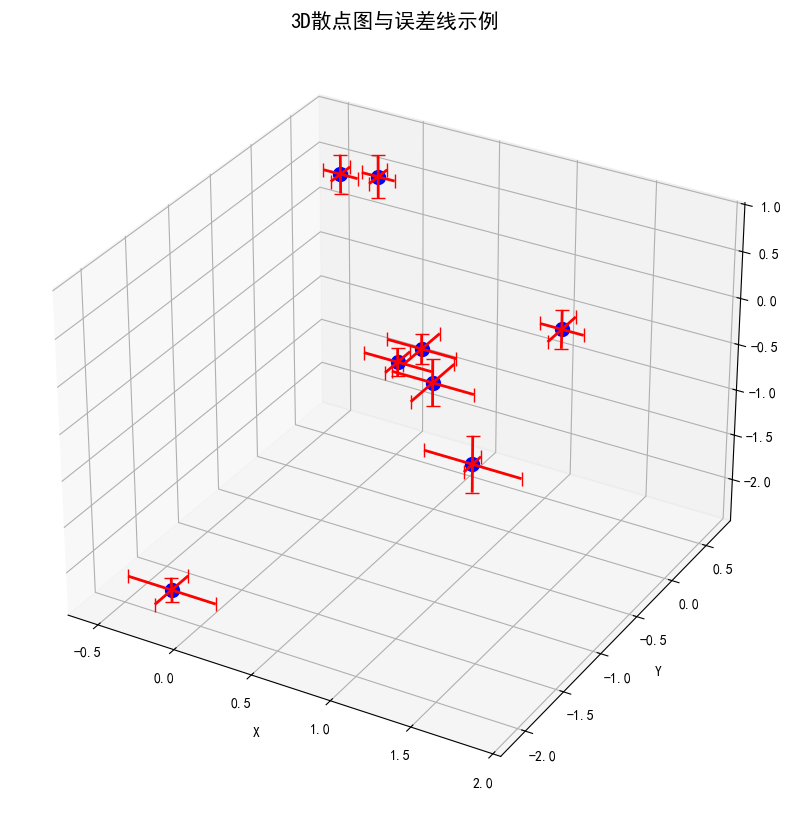

In [3]:
# 生成示例数据
np.random.seed(42)
n_points = 8

# 随机数据点
x = np.random.normal(0, 1, n_points)
y = np.random.normal(0, 1, n_points)
z = x + y + np.random.normal(0, 0.5, n_points)

# 生成误差值（可以是固定值或数组）
xerr = 0.1 + 0.2 * np.random.random(n_points)
yerr = 0.1 + 0.2 * np.random.random(n_points)
zerr = 0.1 + 0.2 * np.random.random(n_points)

# 创建3D图形
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# 绘制带误差线的3D散点图
errorbar = ax.errorbar(
    x, y, z,               # 数据点的三维坐标
    xerr=xerr,             # x方向误差
    yerr=yerr,             # y方向误差
    zerr=zerr,             # z方向误差
    fmt='o',               # 数据点样式
    color='blue',          # 数据点颜色
    ecolor='red',          # 误差线颜色
    elinewidth=2,          # 误差线宽度
    capsize=5,             # 误差线末端帽子的大小
    markersize=10,         # 数据点大小
)


ax.set_title('3D散点图与误差线示例', fontsize=15)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

# 2、使用示例：

### 示例 1：不对称误差线处理

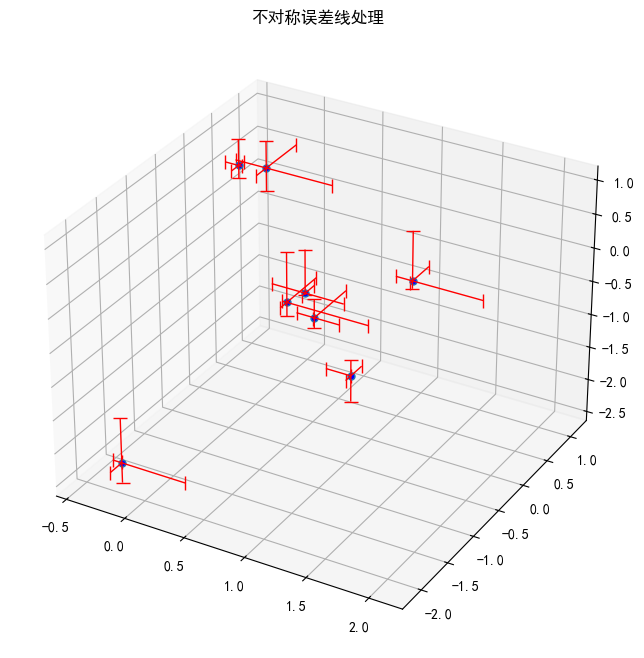

In [4]:
np.random.seed(2025)
# 创建不对称误差数据
x_err_lower = np.random.rand(n_points) * 0.3
x_err_upper = np.random.rand(n_points) * 0.7
x_err_asym = [x_err_lower, x_err_upper]  # 分别表示下误差和上误差

# 同样可以定义y和z方向的不对称误差
y_err_asym = [np.random.rand(n_points) * 0.2, np.random.rand(n_points) * 0.6]
z_err_asym = [np.random.rand(n_points) * 0.4, np.random.rand(n_points) * 0.8]

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.errorbar(x, y, z, 
           xerr=x_err_asym,   # x方向不对称误差
            yerr=y_err_asym,  # y方向不对称误差
            zerr=z_err_asym,  # z方向不对称误差
           fmt='o', 
           ecolor='red',
           elinewidth=1,
           capsize=5, 
           markersize=5, 
           markerfacecolor='blue',
           markeredgewidth=1,
)

plt.title('不对称误差线处理')
plt.show()

### 示例 2：自定义误差线样式

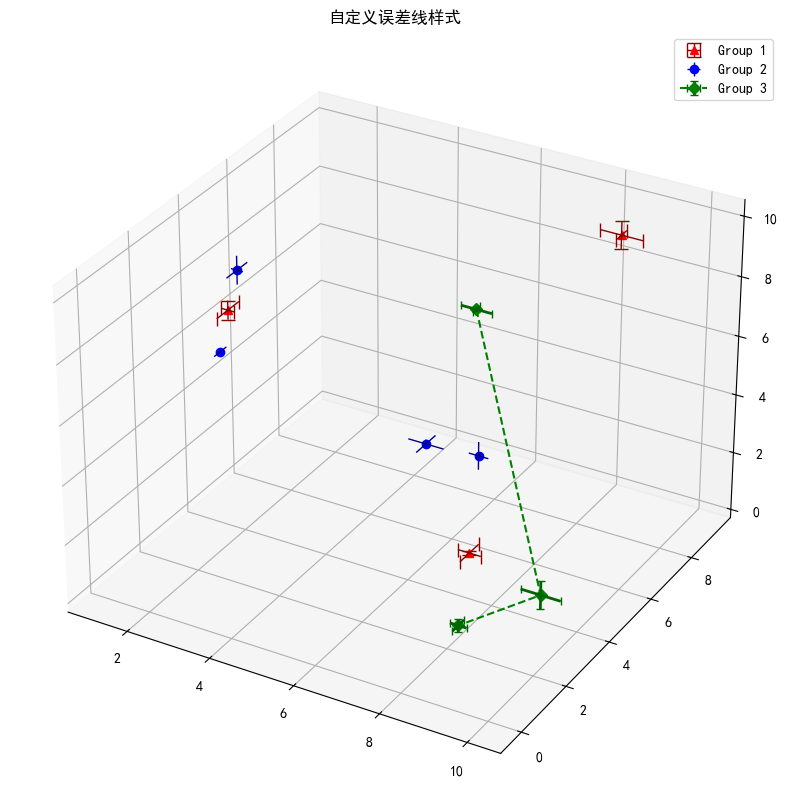

In [5]:
# 创建数据
np.random.seed(2025)
n_points = 10
x = np.random.rand(n_points) * 10
y = np.random.rand(n_points) * 10
z = np.random.rand(n_points) * 10
# 定义误差值
x_err = np.random.rand(n_points) * 0.5
y_err = np.random.rand(n_points) * 0.5
z_err = np.random.rand(n_points) * 0.5

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# 分组数据，使用不同样式
group1 = slice(0, 3)
group2 = slice(3, 7)
group3 = slice(7, 10)

# 第一组数据
ax.errorbar(
    x[group1], y[group1], z[group1],  # 第一组数据点
    xerr=x_err[group1], yerr=y_err[group1], zerr=z_err[group1],  # 对应组的误差值
    fmt='^',               # 数据点样式
    color='red',           # 数据点颜色
    ecolor='darkred',      # 误差线颜色
    elinewidth=1,          # 误差线宽度
    capsize=5,             # 误差线末端帽子大小
    capthick=1,            # 误差线帽子厚度
    label='Group 1'        # 该组数据的标签，用于图例显示
)

# 第二组数据
ax.errorbar(
    x[group2], y[group2], z[group2],  # 第二组数据点
    xerr=x_err[group2], yerr=y_err[group2], zerr=z_err[group2],  # 对应组的误差值
    fmt='o',               # 数据点样式
    color='blue',          # 数据点颜色
    ecolor='darkblue',     # 误差线颜色
    elinewidth=1,          # 误差线宽度
    capsize=0,             # 误差线末端无帽子
    label='Group 2'        # 该组数据的标签
)

# 第三组数据
ax.errorbar(
    x[group3], y[group3], z[group3],  # 第三组数据点
    xerr=x_err[group3], yerr=y_err[group3], zerr=z_err[group3],  # 对应组的误差值
    fmt='D',               # 数据点样式
    color='green',         # 数据点颜色
    ecolor='darkgreen',    # 误差线颜色
    elinewidth=2,          # 误差线宽度
    capsize=3,             # 误差线末端帽子大小
    linestyle='dashed',    # 误差线线型
    label='Group 3'        # 该组数据的标签
)

ax.legend()
plt.title('自定义误差线样式')
plt.show()

### 示例 3：控制误差线显示频率

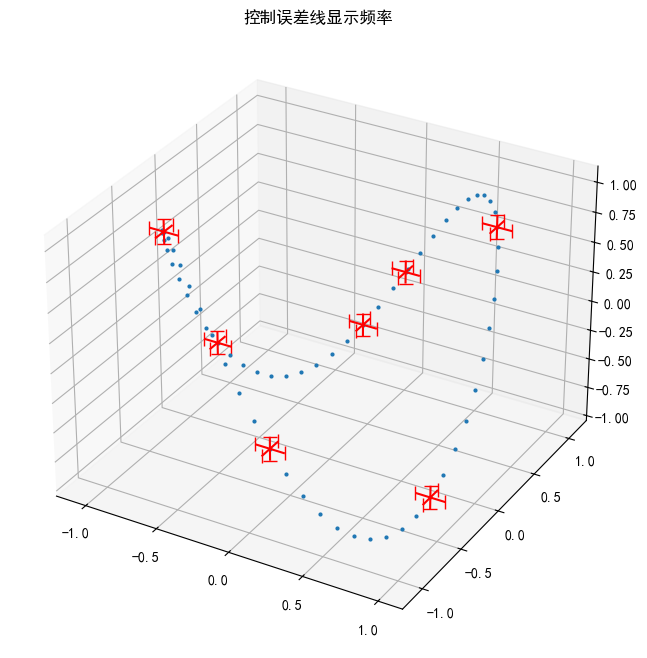

In [6]:
# 生成数据
t = np.arange(0, 2*np.pi + 0.1, 0.1)  # 更多数据点
x, y, z = np.sin(t), np.cos(t), np.sin(2*t)
xerr, yerr, zerr = 0.1, 0.1, 0.1

# 创建3D图形
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 绘制带误差线的3D曲线，每隔10个点显示一次误差线
ax.errorbar(
    x, y, z, 
    xerr=xerr, yerr=yerr, zerr=zerr, 
    fmt='o', 
    ecolor='red', 
    markersize=2, 
    capsize=5, 
    errorevery=10    # 误差线显示间隔：每10个点显示一次误差线
)
plt.title('控制误差线显示频率')
plt.show()